In [1]:
import os
import pickle
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
load_dir = 'F:/OneDrive - American International University-Bangladesh/Semester-10/COMPUTER VISION AND PATTERN RECOGNITION/CVPR/final/facial_recognition'

pickle_in = open(os.path.join(load_dir, "categories.pickle"), "rb")
categories = pickle.load(pickle_in)

pickle_in = open(os.path.join(load_dir, "X_train.pickle"), "rb")
X_train = pickle.load(pickle_in)

pickle_in = open(os.path.join(load_dir, "y_train.pickle"), "rb")
y_train = pickle.load(pickle_in)

pickle_in = open(os.path.join(load_dir, "X_test.pickle"), "rb")
X_test = pickle.load(pickle_in)

pickle_in = open(os.path.join(load_dir, "y_test.pickle"), "rb")
y_test = pickle.load(pickle_in)

In [3]:
model = keras.Sequential([
    ## input layer
    keras.Input(shape=(256,256,3)),
    
    ## hidden layers
    layers.Conv2D(filters=64, kernel_size=(5,5), activation='relu'), # input->(32,32) output->(28,28)
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2,2)),
    
    layers.Conv2D(filters=128, kernel_size=(5,5), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2,2)),
    
    layers.Conv2D(filters=256, kernel_size=(3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2,2)),
    
    layers.Conv2D(filters=256, kernel_size=(3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2,2)),
    
    layers.Conv2D(filters=256, kernel_size=(3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2,2)),
    
    
    
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    
    ## output layer
    layers.Dense(18, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 252, 252, 64)      4864      
                                                                 
 batch_normalization (BatchN  (None, 252, 252, 64)     256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 126, 126, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 128)     204928    
                                                                 
 batch_normalization_1 (Batc  (None, 122, 122, 128)    512       
 hNormalization)                                                 
                                                        

In [4]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-4), 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [5]:
cb = EarlyStopping(monitor='val_loss', min_delta=0.02, patience=3, restore_best_weights=True)
h = model.fit(x=X_train, y=y_train, epochs=150, validation_split=0.2, batch_size=32, callbacks=[cb])

Epoch 1/150
3/3 [==============================] - 16s 1s/step - loss: 4.6137 - accuracy: 0.0729 - val_loss: 6.2924 - val_accuracy: 0.0400
Epoch 2/150
3/3 [==============================] - 1s 297ms/step - loss: 1.9837 - accuracy: 0.4792 - val_loss: 4.7591 - val_accuracy: 0.0800
Epoch 3/150
3/3 [==============================] - 1s 296ms/step - loss: 0.8729 - accuracy: 0.7083 - val_loss: 4.6657 - val_accuracy: 0.0800
Epoch 4/150
3/3 [==============================] - 1s 293ms/step - loss: 0.6227 - accuracy: 0.8333 - val_loss: 4.7352 - val_accuracy: 0.0800
Epoch 5/150
3/3 [==============================] - 1s 303ms/step - loss: 0.4218 - accuracy: 0.8646 - val_loss: 4.7450 - val_accuracy: 0.0800
Epoch 6/150
3/3 [==============================] - 1s 317ms/step - loss: 0.2614 - accuracy: 0.9583 - val_loss: 4.5828 - val_accuracy: 0.0800
Epoch 7/150
3/3 [==============================] - 1s 313ms/step - loss: 0.1777 - accuracy: 0.9583 - val_loss: 4.3964 - val_accuracy: 0.0800
Epoch 8/150
3/3

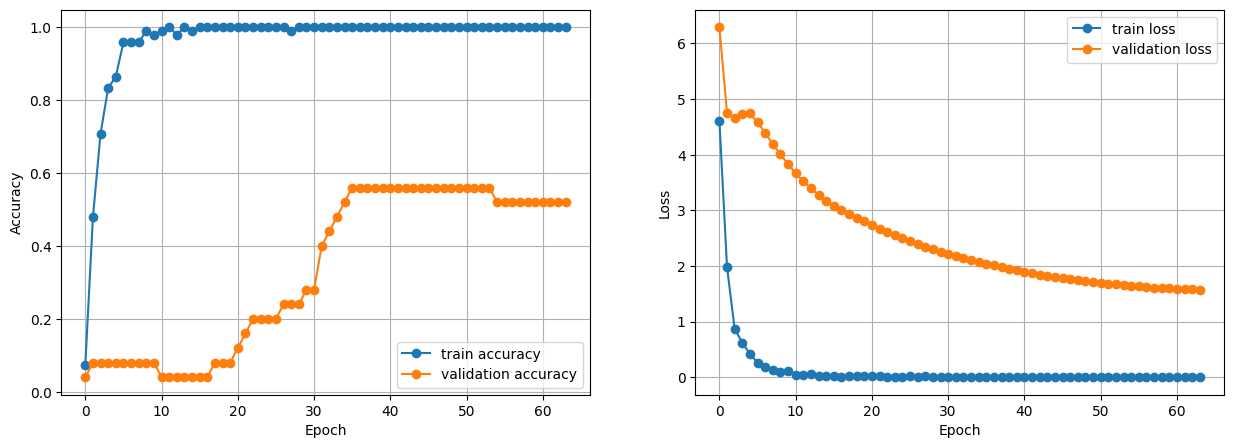

In [6]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [7]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

2/2 [==============================] - 1s 1s/step - loss: 1.7343 - accuracy: 0.5849

Test Accuracy: 0.5849056839942932

Test Loss: 1.7342630624771118


In [8]:
predictions = model.predict(X_test)

2/2 [==============================] - 0s 43ms/step


In [9]:
model_path = 'F:/OneDrive - American International University-Bangladesh/Semester-10/COMPUTER VISION AND PATTERN RECOGNITION/CVPR/final/facial_recognition'

model.save(os.path.join(model_path, "cnn.h5"))

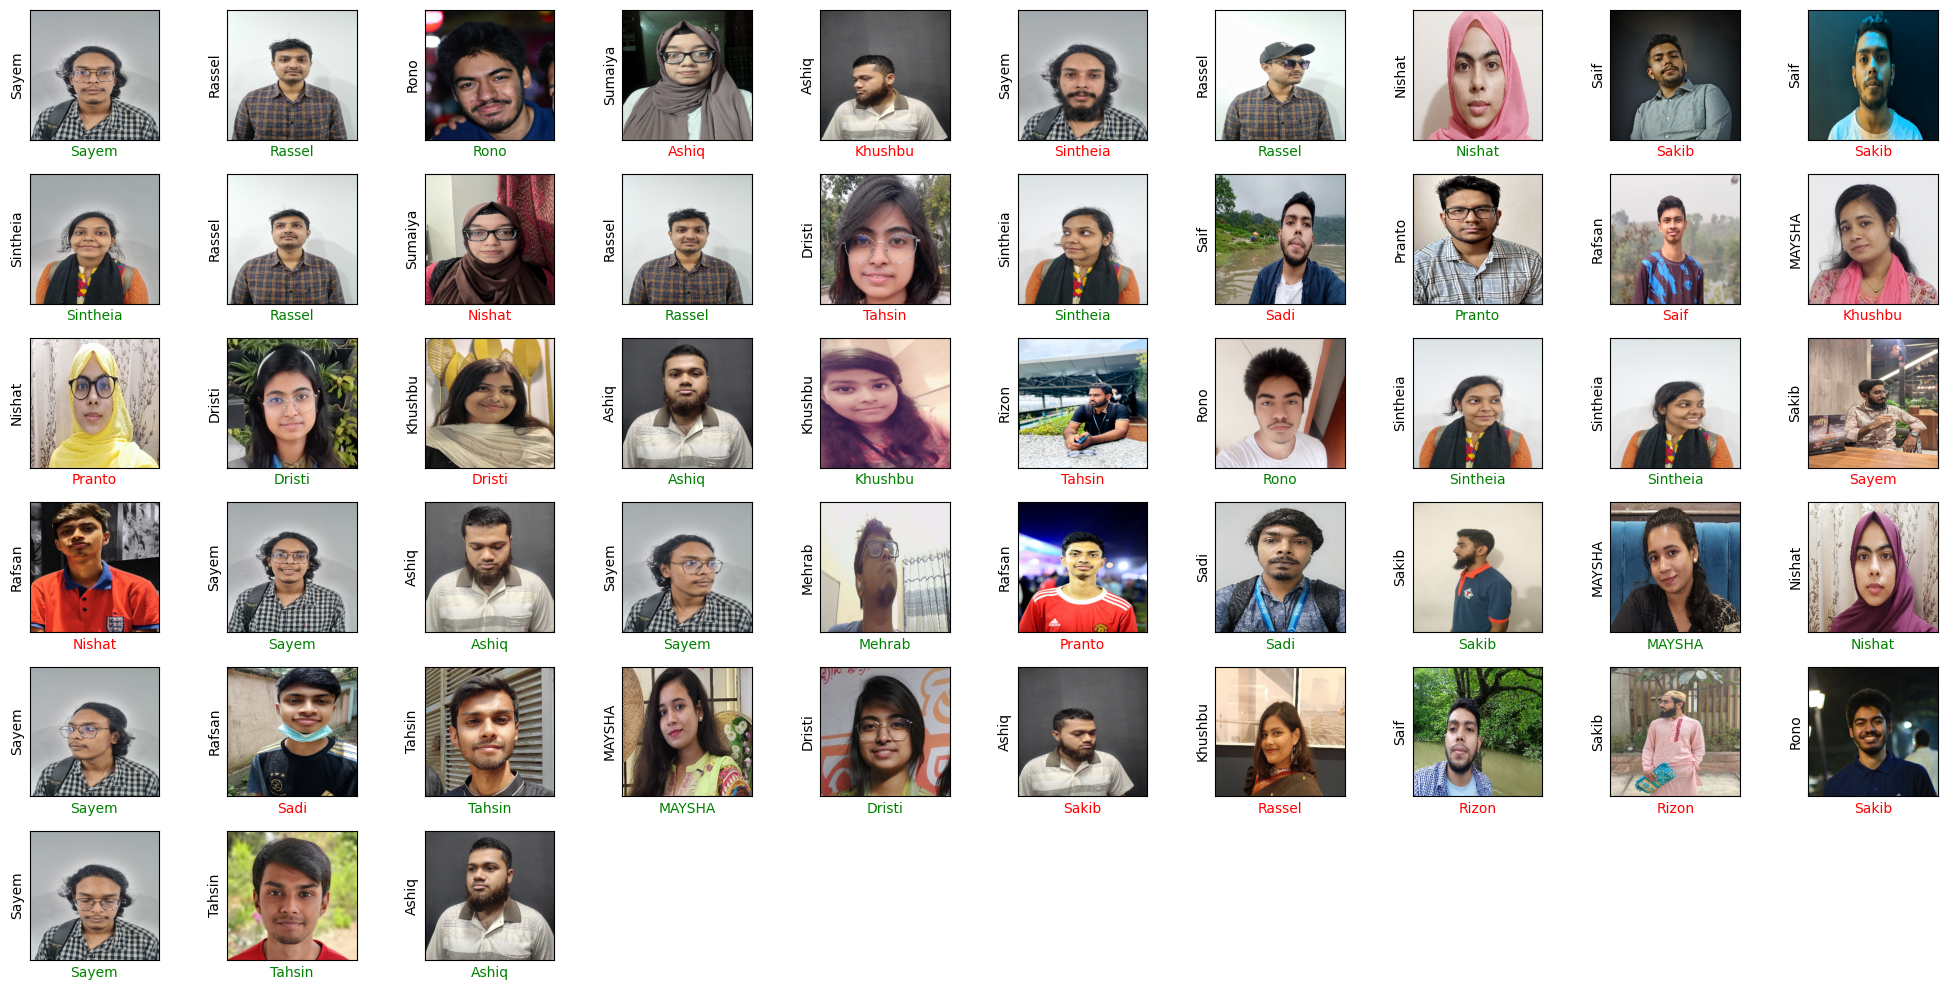

In [10]:
rows = 5
cols = 5

plt.figure(figsize=(20,10))
for i in range(len(X_test)):
    
    plt.subplot(6, 10, i+1)
    plt.imshow(X_test[i].astype(np.uint8))
    plt.xticks([])
    plt.yticks([])
    plt.ylabel(categories[y_test[i]])
    if y_test[i] == np.argmax(predictions[i]):
        plt.xlabel(categories[np.argmax(predictions[i])], color='g')
    else:
        plt.xlabel(categories[np.argmax(predictions[i])], color='r')
        
    

plt.tight_layout()
plt.show()